# **Kaggle Competitions**

# **House Prices - Advanced Regression Techniques**

[Matheus Muniz](https://www.linkedin.com/in/math-muniz/) - 03/2024

### Você pode consultar mais sobre o meu [github](https://github.com/Math-Muniz).


### Você pode consultar mais sobre a competição deste kernel clicando neste [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).


### Eu não diria que conhecer seus dados é a coisa mais difícil em ciência de dados, mas as vezes é demorado. Portanto, é fácil ignorar esse passo inicial e ir direto para o nosso modelo.

### Então fiz o meu melhor para seguir uma análise abrangente, mas não exaustiva, dos dados. Eu estou longe de relatar um estudo rigoroso neste kernel, mas espero que possa ser útil para todos, então estou compartilhando como apliquei alguns desses princípios de análise de dados a esse problema.


# Nós iremos ter 7 capítulos neste notebook que eu tento explicar como foi feita minha ánalise passo a passo:


1.   **Entendendo nosso problema.** Nesse capítulo vamos olhar para cada variável e fazer uma análise filosófica sobre seu significado e a importância para este problema.
2.   **Estudo univariável.** Vamos nos concentrar apenas na variável dependente ('SalePrice') e tentar saber um pouco mais sobre ela.
3.   **Estudo multivariado.** Tentaremos entender como a variável dependente e as variáveis ​​independentes se relacionam.
4.   **Limpeza básica.** Vamos limpar o conjunto de dados e lidar com os dados ausentes, valores discrepantes e variáveis ​​categóricas.
5.   **Testar suposições.** Verificaremos se nossos dados atendem às suposições exigidas pela maioria das técnicas multivariadas.
6.   **Mãos a obra com Machine Learning.** Aqui iremos ver sobre o modelo de regressão linear e sobre algumas métricas usadas para avaliar o potencial do modelo.
7.   **Conclusão.** Infelizmente chegamos ao último capítulo, nele vão ser concluidas todas nossas análises.




## Este Nootebook usará as seguintes bibliotecas e suas versões:



1.   Nome: Python | Versão: 3.7.13
2.   Nome: pandas | Versão: 1.3.5
3.   Nome: matplotlib | Versão: 3.2.2
4.   Nome: seaborn | Versão: 0.11.2
5.   Nome: numpy | Versão: 1.21.6
6.   Nome: scipy | Versão: 1.7.3
7.   Nome: sklearn | Versão: 0.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
from google.colab import files
import warnings
from google.colab import drive
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Lasso
warnings.filterwarnings('ignore')
%matplotlib inline

## Abaixo vamos começar a baixar nossos dados de treino e teste que estão no Google Drive e a fazer um pouco da analise exploratória para conhecer mais nossos dados.

In [ ]:
#Montando o Google Drive no Colab
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importando o arquivo train.csv e test.csv do Google Drive

caminho1 = "/content/drive/MyDrive/Colab Notebooks/housetrain.csv"
df_train = pd.read_csv (caminho1)
caminho2 = "/content/drive/MyDrive/Colab Notebooks/housetest.csv"
df_test = pd.read_csv (caminho2)

In [ ]:
# Checando as colunas contidas no arquivo csv que importamos
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
# Checando mais informações sobre o arquivo csv que importamos
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#Visualizando o Dataframe completo
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
#Visualizando os 10 primeiros dados do DataFrame
df_train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
#Selecionando as Colunas Numéricas
df_train.select_dtypes(include='number').head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#Separando as colunas somente com valores inteiros
df_train.select_dtypes(include=['int'])

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
#Separando as Colunas somente com valores flutuantes
df_train.select_dtypes(include=['float'])

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [ ]:
#Selecionando as Colunas de Objeto
df_train.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [ ]:
#Verificamos se exite algum dado duplicado pelo ID
df_train[df_train.duplicated(['Id'], keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#1. **Entendendo nosso problema**

Para entender nossos dados, podemos olhar para cada variável e tentar entender seu significado e relevância para este problema. Eu sei que isso é demorado, mas é completamente necessário conhecermos nossos dados antes de analisarmos e mexermos nele.

Para termos alguma disciplina em nossas análises, podemos criar uma planilha Excel ou uma Google Sheets com as seguintes colunas:

1.   **Variável** - Nome da variável.

2.   **Tipo** - Identificação do tipo das variáveis. Existem dois valores possíveis para este campo: 'numérico' ou 'categórico'. Por 'numérico' queremos dizer variáveis ​​para os quais os valores são números, e por 'categórico' queremos dizer variáveis ​​para os quais os valores são categorias.

3.   **Segmento** - Identificação do segmento das variáveis. Podemos definir três segmentos possíveis: construção, espaço ou localização. Quando dizemos 'construção', queremos dizer uma variável que se relaciona com as características físicas do edifício (por exemplo, 'OverallQual'). Quando dizemos 'espaço', queremos dizer uma variável que informa as propriedades do espaço da casa (por exemplo, 'TotalBsmtSF'). Finalmente, quando dizemos 'localização', queremos dizer uma variável que fornece informações sobre o local onde a casa está localizada (por exemplo, 'Neighborhood').

4.   **Expectativa** - Nossa expectativa sobre a influência da variável em 'SalePrice'. Podemos usar uma escala categórica com 'Alto', 'Médio' e 'Baixo' como valores possíveis.

5.   **Conclusão** - Nossas conclusões sobre a importância da variável, após darmos uma rápida olhada nos dados. Podemos manter a mesma escala categórica de 'Expectativa'.

6.   **Comentários** - Quaisquer comentários gerais que nos ocorreram.

Enquanto 'Tipo' e 'Segmento' são apenas para possível referência futura, a coluna 'Expectativa' é importante porque nos ajudará a desenvolver um 'sexto sentido'. Para preencher esta coluna, devemos ler a descrição de todas as variáveis ​​e, uma a uma, nos perguntar:

1.   Pensamos nessa variável quando estamos comprando uma casa? (por exemplo, quando pensamos na casa dos nossos sonhos, nos preocupamos com o seu 'tipo de folheado de alvenaria'?).
2.   Se sim, qual seria a importância dessa variável? (por exemplo, qual é o impacto de ter material 'Excelente' no exterior em vez de 'Ruim'? E de ter 'Excelente' em vez de 'Bom'?).
3.   Essa informação já está descrita em alguma outra variável? (por exemplo, se 'LandContour' dá a planicidade da propriedade, realmente precisamos conhecer o 'LandSlope'?).

Após este exercício assustador, podemos filtrar a planilha e olhar atentamente para as variáveis ​​com 'Alta' 'Expectativa'. Então, podemos nos apressar em alguns gráficos de dispersão entre essas variáveis ​​e 'SalePrice', preenchendo a coluna 'Conclusão' que é apenas a correção de nossas expectativas.

Passei por esse processo e concluí que as seguintes variáveis ​​podem ter um papel importante nesse problema:

1.   ***OverallQual*** (que é uma variável que não gosto porque não sei como foi calculada; um exercício engraçado seria prever 'OverallQual' usando todas as outras variáveis ​​disponíveis).
2.   ***YearBuilt***.
3.   ***TotalBsmtSF***.
4.   ***GrLivArea***.

Acabei com duas variáveis ​​de 'construção' ('OverallQual' e 'YearBuilt') e duas variáveis ​​de 'espaço' ('TotalBsmtSF' e 'GrLivArea'). Isso pode ser um pouco inesperado, pois vai contra o mantra imobiliário de que tudo o que importa é 'localização, localização e localização'. É possível que esse processo rápido de análise de dados tenha sido um pouco duro para variáveis ​​categóricas. Por exemplo, eu esperava que a variável 'Vizinhança' fosse mais relevante, mas após o exame dos dados acabei excluindo-a. Talvez isso esteja relacionado ao uso de gráficos de dispersão ao invés de boxplots, que são mais adequados para visualização de variáveis ​​categóricas. A maneira como visualizamos os dados geralmente influencia nossas conclusões.

No entanto, o ponto principal deste exercício foi pensar um pouco sobre nossos dados e expectativas, então acho que atingimos nosso objetivo. Agora é hora de 'um pouco menos de conversa, um pouco mais de ação, por favor'. **Então vamos começar nossa diversão.**

#**2. Antes de mais nada: analisando 'SalePrice'**

'SalePrice' é o motivo da nossa busca.


In [ ]:
#Analise Estatistica da Variavel 'SalePrice'
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


Muito bem... Parece que seu preço mínimo é maior que zero.


<Axes: xlabel='SalePrice', ylabel='Density'>

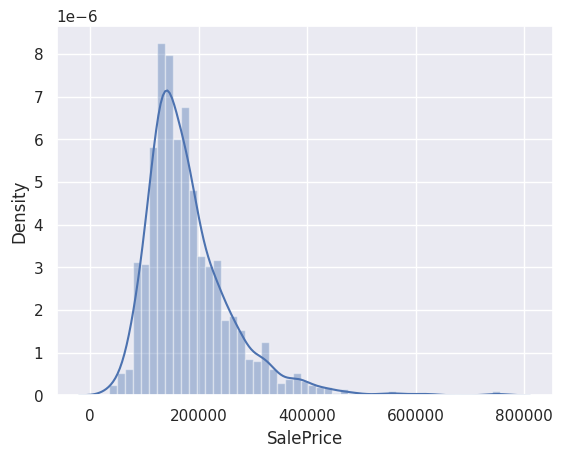

In [ ]:
#Histograma
sns.distplot(df_train['SalePrice'])

Com esse Histograma podemos analisar que os nossos dados tem:

* <b>Desvio da distribuição normal.</b>
* <b>Tem assimetria positiva apreciável.</b>
* <b>Mostra picos.</b>

*Isso está ficando interessante então vamos continuar nossa Análise!*

In [ ]:
#Skewness and Kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Skewness e Kurtosis**

Um **valor positivo de Skewness (Assimetria)** implica uma inclinação para a direita. A cauda direita do gráfico de densidade de probabilidade é mais longa que a esquerda.
Podemos descrever distribuições com uma Skewness (Assimetria) **inferior a -1 ou superior a 1** como substancialmente assimétrica.

Um **valor positivo de Kurtosis** significa que seu conjunto de dados é **mais "pesado no pico"** (pontiagudo) do que a distribuição normal;
Consideramos distribuições com Kurtosis **maior que 1** muito pontiagudo.

## 'SalePrice', análise de variáveis com papéis importantes

Na parte seguinte iremos analisar algumas variáves númericas como 'GrLivArea' e 'TotalBsmtSF'. Além disso, também temos interesses em outras variáveis, como 'OverallQual' e 'YearBuilt'.

Para tirar o máximo proveito de nossa pesquisa, começaremos analisando cuidadosamente as variáveis númericas e depois nos concentraremos em nossas variáveis de interesse.

###**Variáveis Númericas**

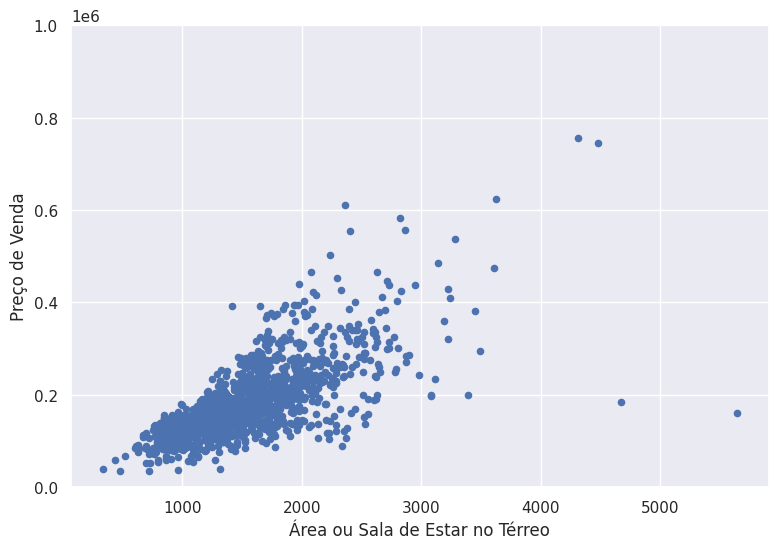

In [ ]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,1000000), figsize=(9,6))
plt.xlabel('Área ou Sala de Estar no Térreo') #Ground Living Area
plt.ylabel('Preço de Venda'); #Sale Price

Hmmm... Parece que 'SalePrice' e 'GrLivArea' são realmente interessantes, podemos ver uma **relação linear** entre eles.

E o 'TotalBsmtSF'?

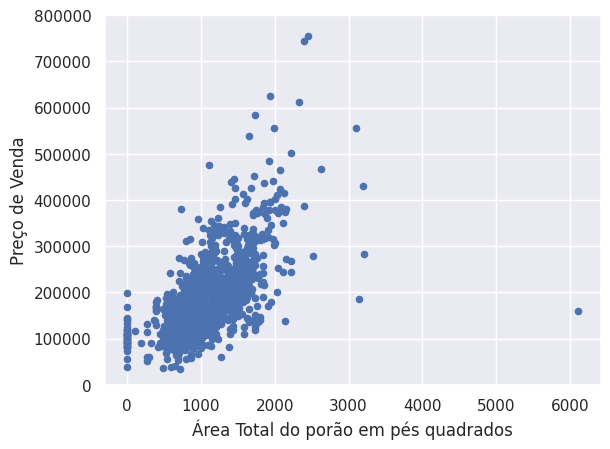

In [ ]:
#Scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.xlabel('Área Total do porão em pés quadrados') #Total area of the Basement in Square Feet / totalbsmtsf
plt.ylabel('Preço de Venda'); #Sale Price

#  Square Feet(Sqft)           | Square Meter (Sqm)
#1 Square Feet to Square Meter | 0.093

'TotalBsmtSF' também é uma variavel bem relacional com 'SalePrice' mas esta parece uma relação diferente! Está tudo bem e de repente, numa reação <b>forte linear (exponencial?)</b>, tudo muda.

###**Variáveis Categóricas**

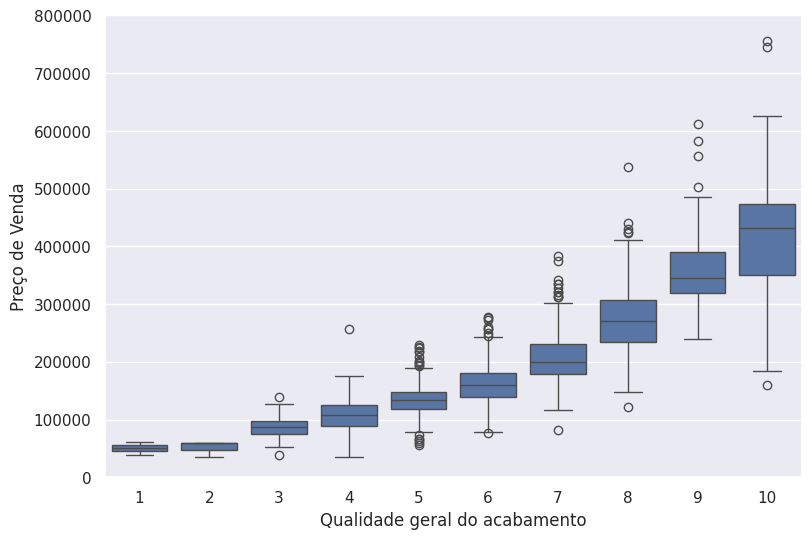

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(9, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xlabel('Qualidade geral do acabamento') #Overall finish quality
plt.ylabel('Preço de Venda'); #Sale Price

Como podemos ver a variável 'SalePrice' tem uma boa relação com a variável 'OverallQual'.

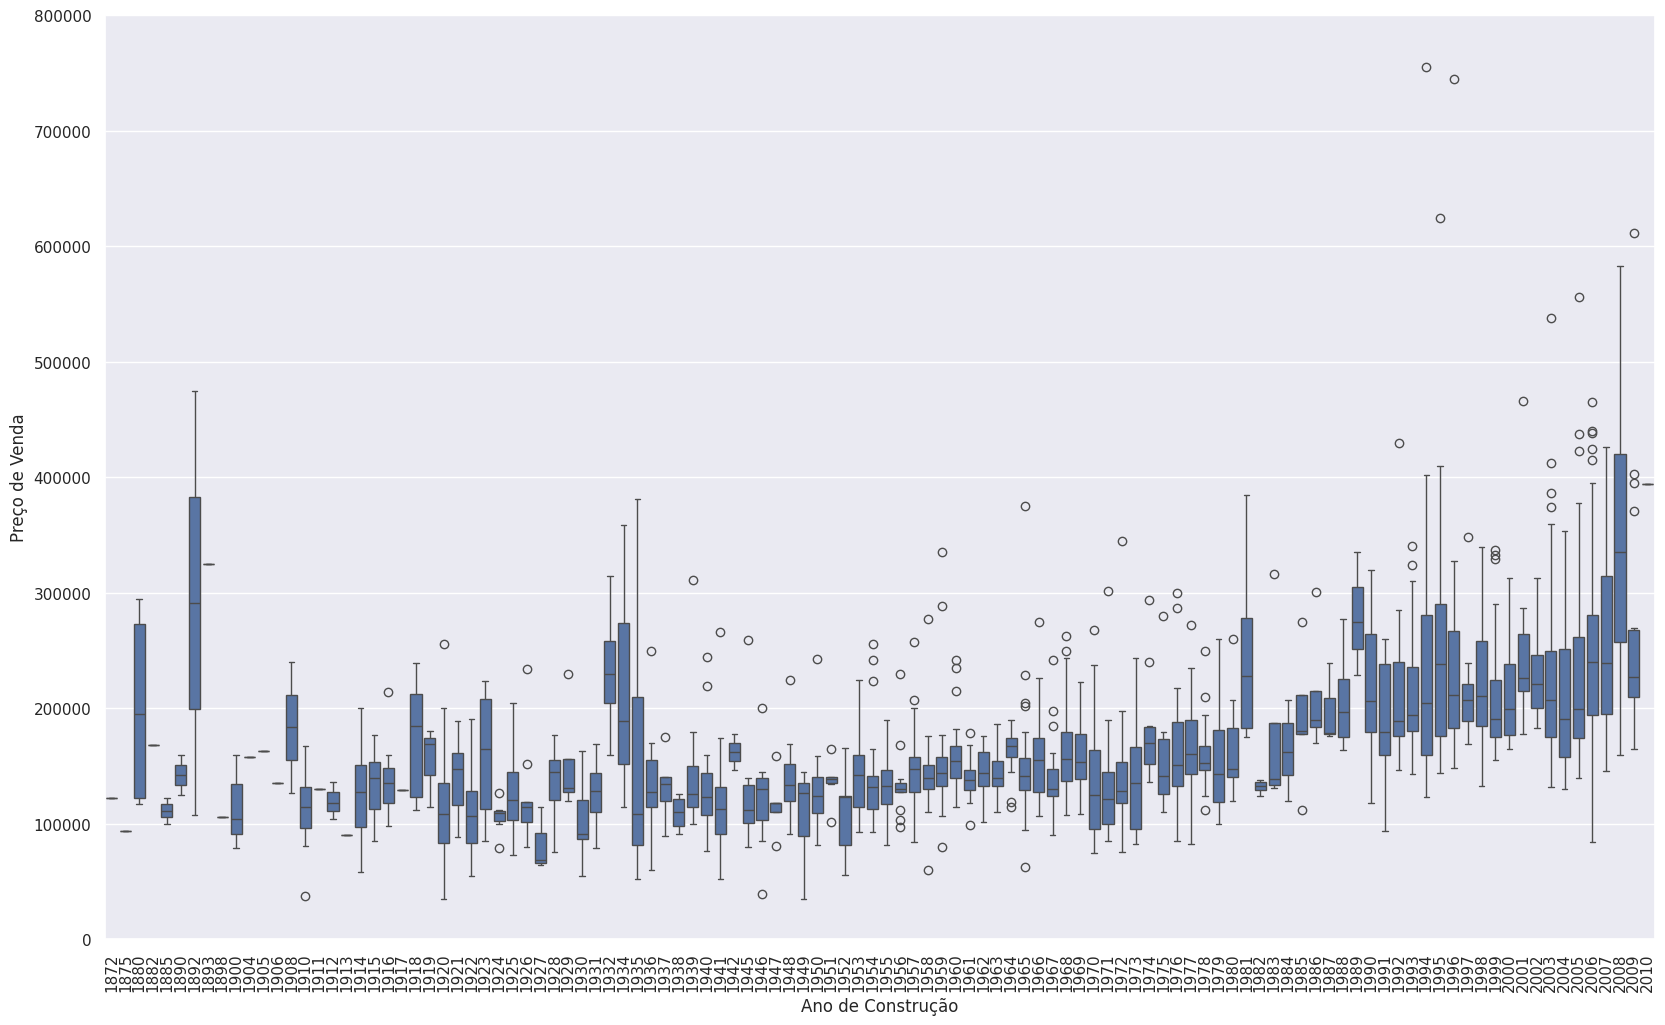

In [ ]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20,12))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90)
plt.xlabel('Ano de Construção') #Year Built
plt.ylabel('Preço de Venda'); #Sale Price

*Embora não seja uma tendência forte, eu diria que 'SalePrice' é mais propenso a coisas novas do que a relíquias antigas.*

<b>Observação</b>: não sabemos se 'SalePrice' está em preços constantes. Preços constantes tentam remover o efeito da inflação. Se 'SalePrice' não estiver em preços constantes, deveria estar, para que os preços sejam comparáveis ​​ao longo dos anos.

## Resumindo

Histórias à parte, podemos concluir que:

* 'GrLivArea' e 'TotalBsmtSF' parecem estar linearmente relacionados com 'SalePrice'. Ambas as relações são positivas, o que significa que à medida que uma variável aumenta, a outra também aumenta. No caso de 'TotalBsmtSF', podemos ver que a inclinação da relação linear é particularmente alta.
* 'OverallQual' e 'YearBuilt' também parecem estar relacionados com 'SalePrice'. A relação parece ser mais forte no caso de 'OverallQual', onde o box plot mostra como os preços de venda aumentam com a qualidade geral do acabamento.

Acabamos de analisar quatro variáveis, mas há muitas outras que devemos analisar. O truque aqui parece ser a escolha dos recursos certos (seleção de recursos) e não a definição de relacionamentos complexos entre eles (engenharia de recursos).


# **3. Estudo multivariado**

Até agora apenas seguimos nossa intuição e analisamos as variáveis ​​que achávamos importantes. Apesar de nossos esforços para dar um caráter objetivo à nossa análise, devemos dizer que nosso ponto de partida foi subjetivo.

Como Analista, não me sinto confortável com essa abordagem. Toda a minha educação foi sobre o desenvolvimento de uma mente disciplinada, capaz de resistir aos ventos da subjetividade. Há uma razão para isso. Tente ser subjetivo na engenharia estrutural e você verá a física fazendo as coisas caírem. Pode doer.

Então, vamos superar a inércia e fazer uma análise mais objetiva.

Para explorar, vamos começar com algumas receitas práticas para dar sentido à nossa analise:

Matriz de correlação (estilo de mapa de calor).

Matriz de correlação 'SalePrice' (estilo de mapa de calor com zoom).

Gráficos de dispersão entre as variáveis ​​mais correlacionadas

<Axes: >

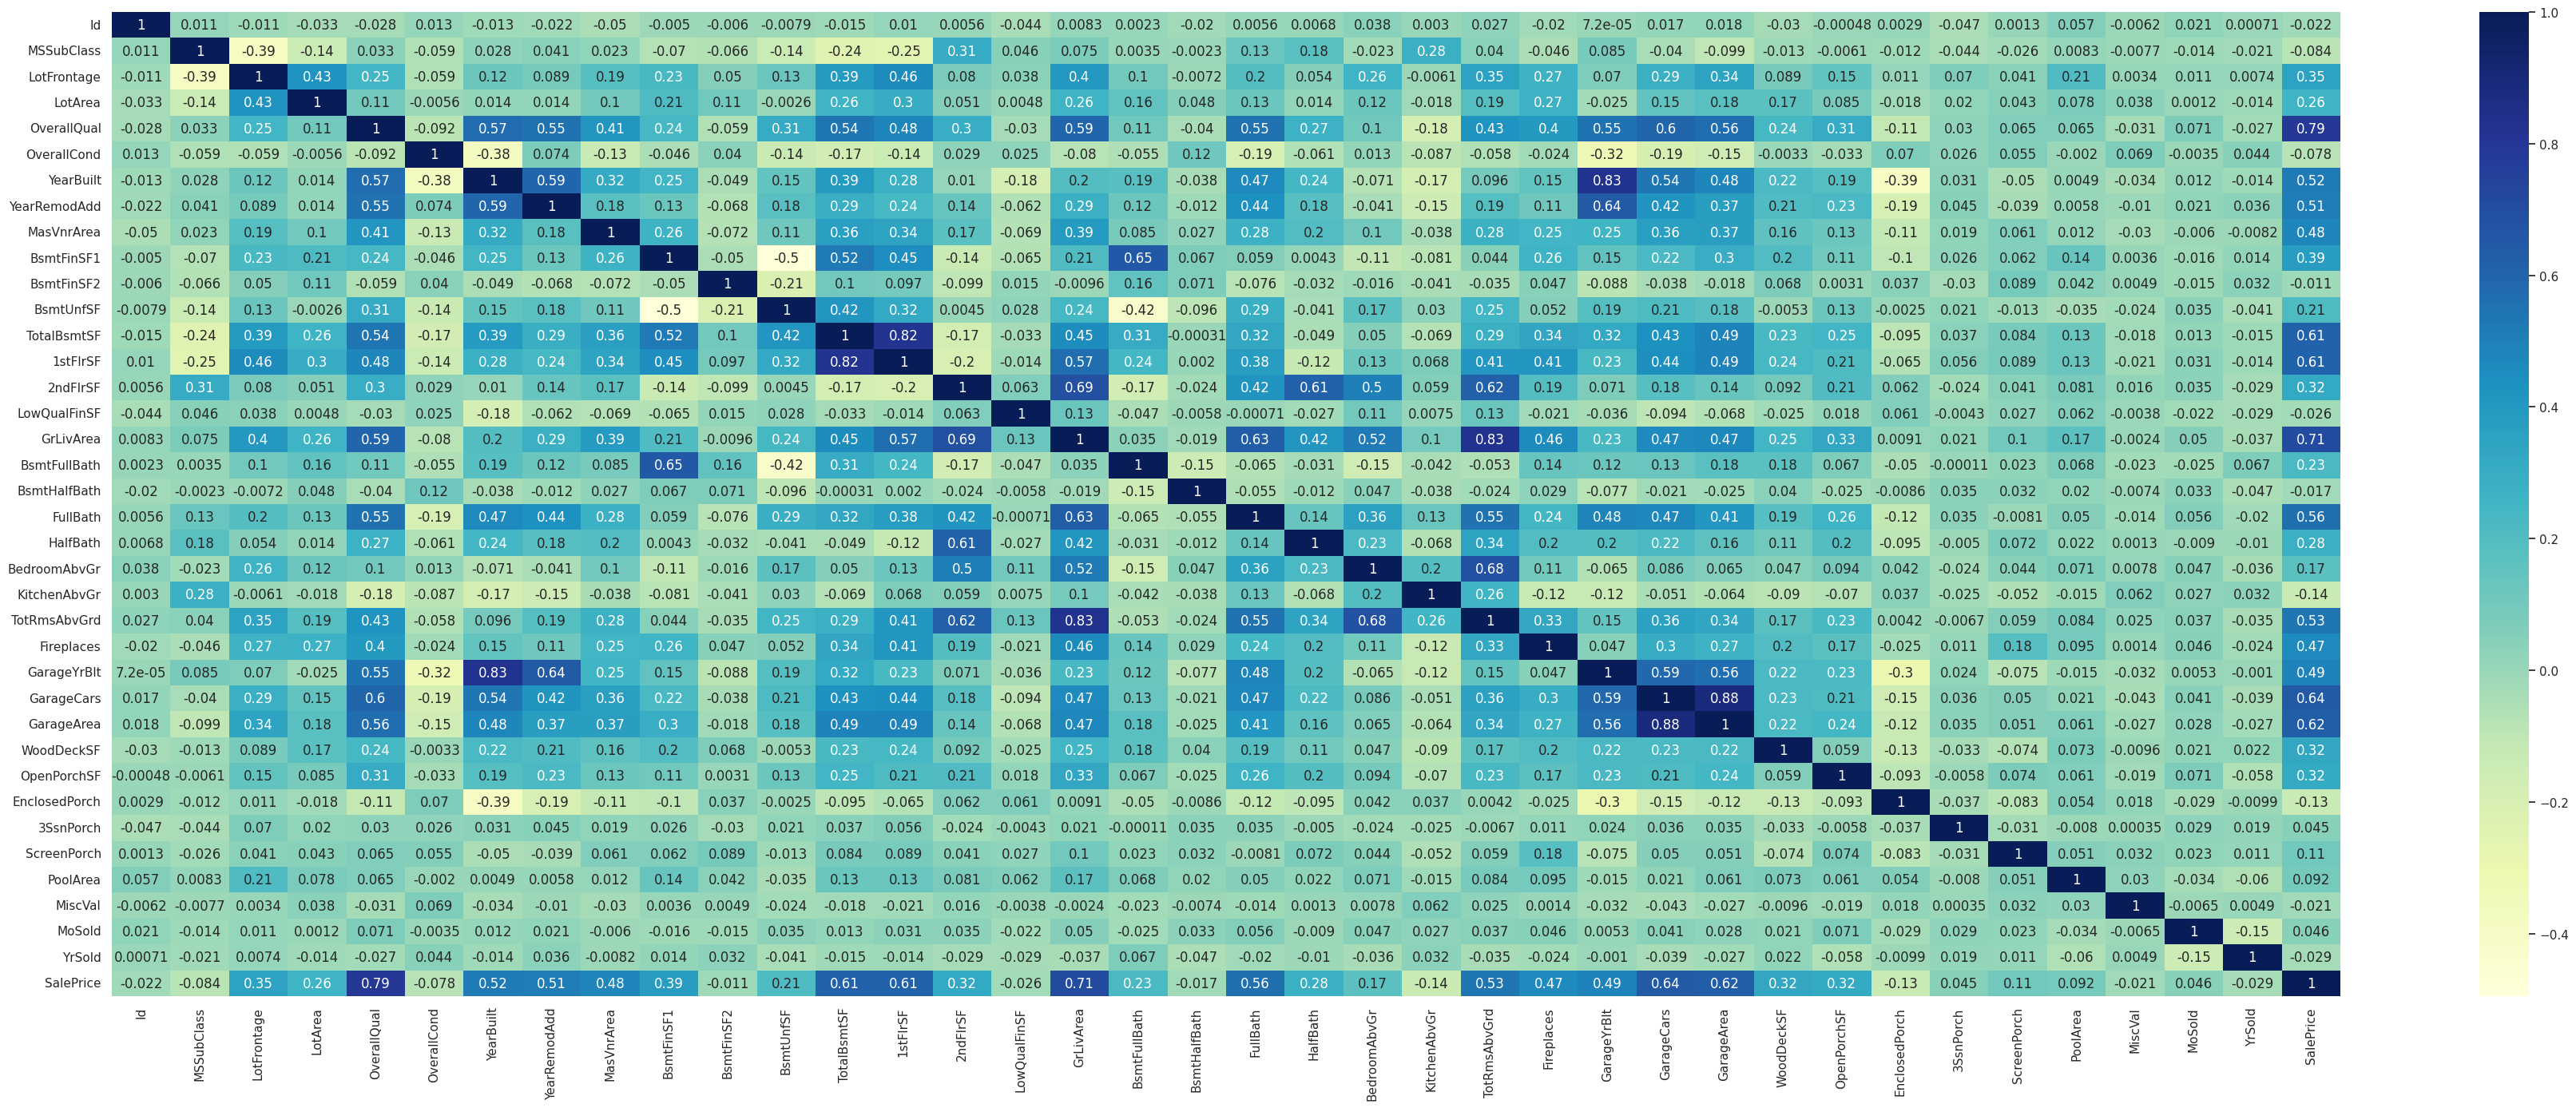

In [ ]:
#Matriz de Correlação
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(45,16))
sns.heatmap(corrmat,cmap='YlGnBu', annot=True)

**Na minha opinião**, este mapa de calor é a melhor maneira de obter uma visão geral rápida de nossos dados e seus relacionamentos. (Obrigado @seaborn!)

À primeira vista, há dois quadrados de cor azul que me chamam a atenção. A primeira refere-se às variáveis ​​'TotalBsmtSF' e '1stFlrSF', e a segunda refere-se às variáveis ​​'GarageX'. Ambos os casos mostram o quão significativa é a correlação entre essas variáveis. Na verdade, essa correlação é tão forte que pode indicar uma situação de multicolinearidade. Se pensarmos nessas variáveis, podemos concluir que elas fornecem quase a mesma informação para que a multicolinearidade realmente ocorra. Os mapas de calor são ótimos para detectar esse tipo de situação e em problemas dominados por seleção de recursos, como o nosso, são uma ferramenta essencial.

Outra coisa que chamou minha atenção foram as correlações 'SalePrice'. Podemos ver nossos conhecidos 'GrLivArea', 'TotalBsmtSF' e 'OverallQual' , mas também podemos ver muitas outras variáveis ​​que devem ser levadas em consideração. É o que faremos a seguir vai ser mostrar todas as váriaves com uma boa correlação que tenham relação com nossa variável analisada 'SalePrice'.

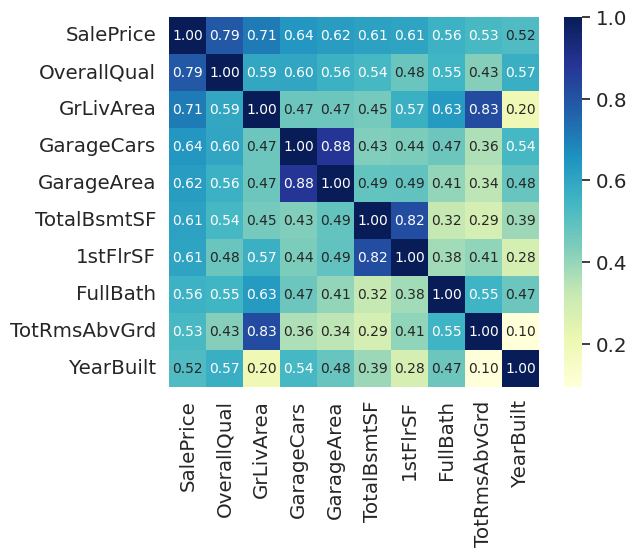

In [ ]:
#Matriz de Correlação 'SalePrice'
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.30)
hm = sns.heatmap(cm, cbar=True, annot=True,  cmap='YlGnBu', square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

De acordo com o nosso maravilhoso python, essas são as variáveis ​​mais correlacionadas com 'SalePrice'. Meus pensamentos sobre isso:

* 'OverallQual', 'GrLivArea' e 'TotalBsmtSF' estão fortemente correlacionados com 'SalePrice'. Podemos verificar no nosso gráfico acima!
* 'GarageCars' e 'GarageArea' também são algumas das variáveis ​​mais fortemente correlacionadas. No entanto, o número de carros que cabem na garagem é consequência da área da garagem. 'GarageCars' e 'GarageArea' são como irmãos gêmeos. Você nunca será capaz de distingui-los. Portanto essa correlação é tão forte que pode indicar uma situação de multicolinearidade então para melhor análise precisamos somente de uma dessas variáveis (podemos manter 'GarageCars' já que sua correlação com 'SalePrice' é maior).
* 'TotalBsmtSF' e '1stFloor' também parecem serem irmãos gêmeos. Podemos manter 'TotalBsmtSF' apenas para dizer que nosso primeiro palpite estava certo (releia o capítulo '1. Entendendo nosso problema').
* 'FullBath'?? Sério? É cada variável que aparece.
* 'TotRmsAbvGrd' e 'GrLivArea', irmãos gêmeos novamente. Este conjunto de dados veio da onde? De qualquer jeito vamos ultilizar o 'GrLivArea.
* Ah... 'YearBuilt'... Parece que 'YearBuilt' está ligeiramente correlacionado com 'SalePrice'. Honestamente, me assusta pensar em 'YearBuilt' porque começo a sentir que devemos fazer um pouco de análise de séries temporais para acertar isso. Vou deixar isso como dever de casa para você.

Vamos prosseguir para os gráficos de dispersão.

## Scatter plots entre 'SalePrice' e as variáveis ​​correlacionadas

Prepare-se para o que você está prestes a ver. Devo confessar que a primeira vez que vi esses gráficos de dispersão fiquei totalmente deslumbrado! Mais uma vez, obrigado @seaborn

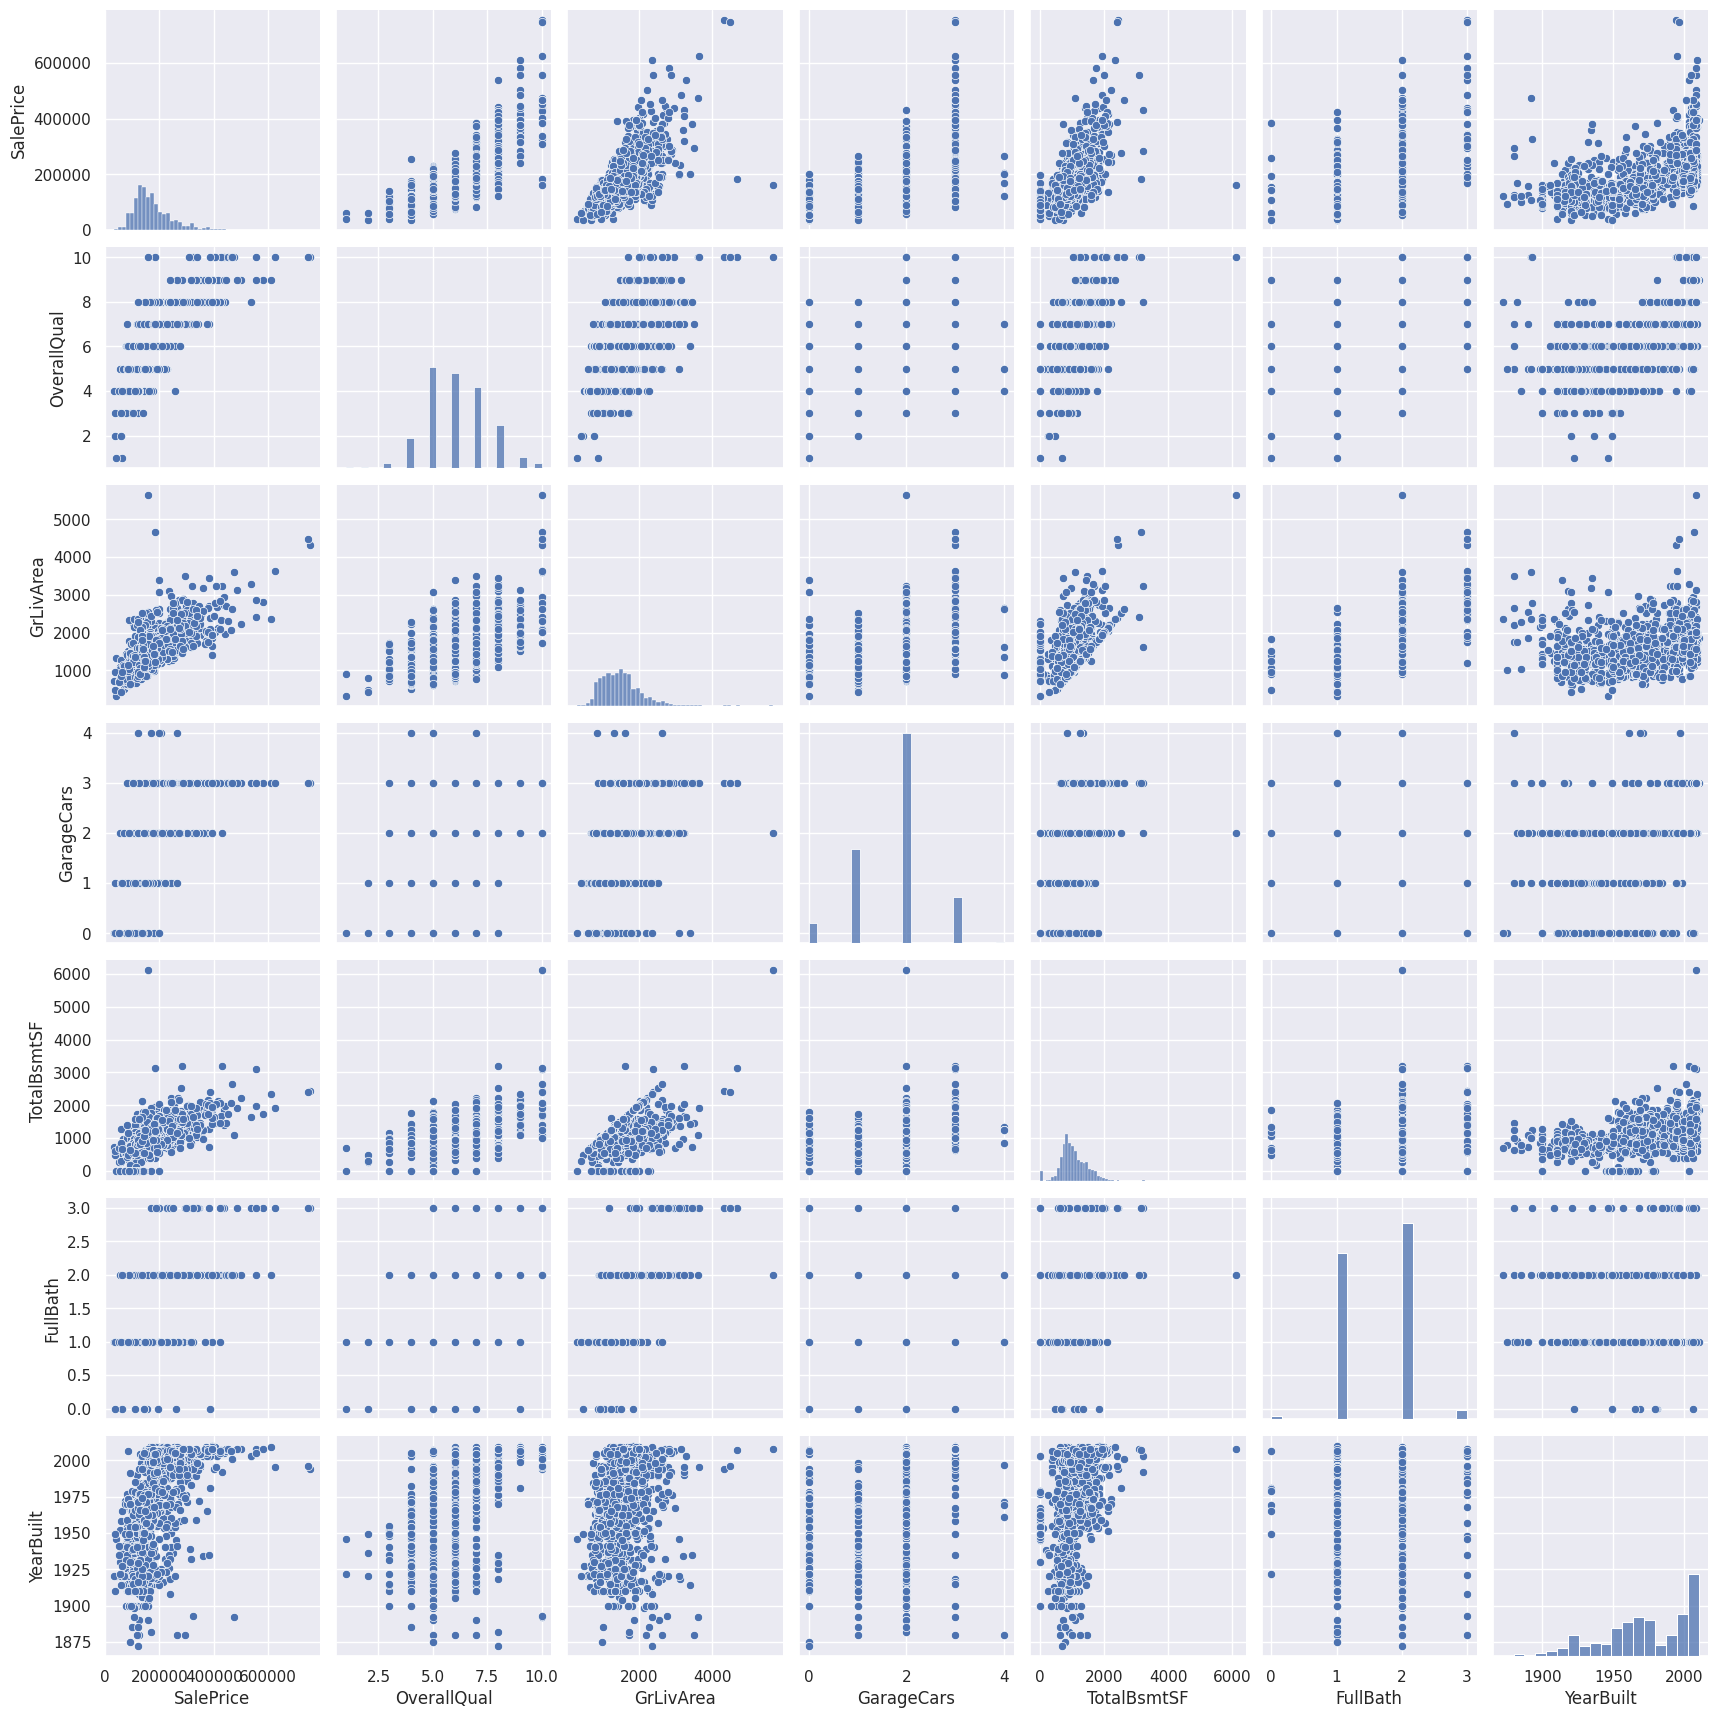

In [ ]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Embora já conheçamos algumas das principais figuras, este mega scatter plot nos dá uma ideia razoável sobre as relações das variáveis.

Uma das figuras que podemos achar interessante é aquela entre 'TotalBsmtSF' e 'GrLiveArea'. Nesta figura podemos ver os pontos desenhando uma linha linear, que quase funciona como uma borda. Faz todo o sentido que a maioria dos pontos fique abaixo dessa linha. As áreas do porão podem ser iguais à área de estar acima do solo, mas não se espera uma área do porão maior do que a área de estar acima do solo (a menos que você esteja tentando comprar um bunker).

O enredo de 'SalePrice' e 'YearBuilt' também pode nos fazer pensar. Na parte inferior da 'nuvem de pontos', vemos o que quase parece ser uma função exponencial tímida (seja criativo). Também podemos ver essa mesma tendência no limite superior da 'nuvem de pontos' (seja ainda mais criativo). Além disso, observe como o conjunto de pontos referente aos últimos anos tende a ficar acima desse limite (só queria dizer que os preços estão subindo mais rápido agora).

Vamos colocar a mão na massa agora para resolver o que está faltando: dados ausentes!

# **4. Limpeza básica**

##**Dados Ausentes!**

Vamos começar com os dados ausentes. As perguntas importantes ao pensar em dados ausentes são:

Qual a prevalência dos dados ausentes?
Os dados ausentes são aleatórios ou têm um padrão?
A resposta a essas perguntas é importante por razões práticas, pois a falta de dados pode implicar na redução do tamanho da amostra. Isso pode nos impedir de prosseguir com a análise. Além disso, de uma perspectiva substantiva, precisamos garantir que o processo de dados ausentes não seja tendencioso e ocultando uma verdade inconveniente.

In [ ]:
#Dados Faltando
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Vamos analisar isso para entender como lidar com os dados ausentes.

Consideraremos que, quando faltar mais de 15% dos dados, devemos excluir a variável correspondente e fingir que ela nunca existiu. Isso significa que não tentaremos nenhum truque para preencher os dados ausentes nesses casos. De acordo com isso, existe um conjunto de variáveis ​​(por exemplo, 'PoolQC', 'MiscFeature', 'Alley', etc.) que devemos excluir. A questão é: vamos perder esses dados? Eu não acho. Nenhuma dessas variáveis ​​parece ser muito importante, já que a maioria delas não são aspectos em que pensamos ao comprar uma casa (talvez seja por isso que faltam dados?). Além disso, olhando mais de perto as variáveis, poderíamos dizer que variáveis ​​como 'PoolQC', 'MiscFeature' e 'FireplaceQu' são fortes candidatas a valores discrepantes, então ficaremos felizes em excluí-las.

No que diz respeito aos restantes casos, podemos ver que as variáveis ​​'GarageX' têm o mesmo número de dados em falta. Aposto que dados ausentes se referem ao mesmo conjunto de observações (embora eu não vá verificar; são apenas 5% e não devemos gastar muito tempo nisto). Como a informação mais importante sobre garagens é expressa por 'GarageCars' e considerando que estamos falando apenas de 5% de dados perdidos, vou excluir as variáveis ​​'GarageX' mencionadas. A mesma lógica se aplica às variáveis ​​'BsmtX'.

Em relação a 'MasVnrArea' e 'MasVnrType', podemos considerar que essas variáveis ​​não são essenciais. Além disso, eles têm uma forte correlação com 'YearBuilt' e 'OverallQual' que já são considerados. Assim, não perderemos informações se excluirmos 'MasVnrArea' e 'MasVnrType'.

Finalmente, temos uma observação ausente em 'Electrical'. Como é apenas uma observação, excluiremos essa observação e manteremos a variável.

Em resumo, para lidar com dados ausentes, excluiremos todas as variáveis ​​com dados ausentes, exceto a variável 'Electrical'. Em 'Electrical' vamos apenas excluir a observação com dados ausentes.

In [ ]:
#Lidando com dados faltantes
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()
#Somente checando que não tem dados faltando

0

##**Outliers!**

Outliers também é algo que devemos estar cientes. Por quê? Porque os outliers podem afetar bastante nossos modelos e podem ser uma valiosa fonte de informação, fornecendo-nos insights sobre comportamentos específicos.

Outliers é um assunto complexo e merece mais atenção então caso queira se aprofundar procure um pouco mais sobre pois aqui, faremos apenas uma análise rápida através do desvio padrão de 'SalePrice' e um conjunto de gráficos de dispersão.

### Análise univariada

A principal preocupação aqui é estabelecer um limite que defina uma observação como um outlier. Para isso, padronizamos os dados. Neste contexto, padronização de dados significa converter valores de dados para ter média de 0 e um desvio padrão de 1.


In [ ]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Vamos verificar como 'SalePrice' fica:

* Os valores do intervalo baixo são semelhantes e não muito distantes de 0.
* Os valores de intervalo alto estão longe de 0 e os valores de 7. alguma coisa estão realmente fora do intervalo.

Por enquanto, não consideraremos nenhum desses valores como um valor atípico, mas devemos ter cuidado com esses dois valores de 7.alguma coisa.

### Análise bivariada
Já sabemos sobre os seguintes gráficos de dispersão. No entanto, quando olhamos para as coisas de uma nova perspectiva, sempre há algo a descobrir.

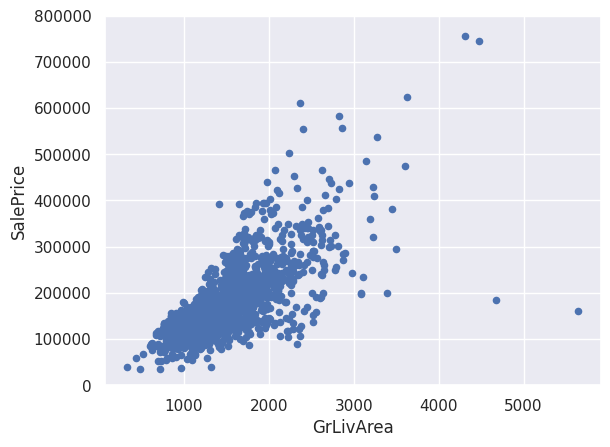

In [ ]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

 O que o gráfico pode nos revelar:

* Os dois valores com maior 'GrLivArea' parecem estranhos e não estão seguindo a multidão. Podemos especular por que isso está acontecendo. Talvez se refiram à área agrícola e isso poderia explicar o baixo preço. Não tenho certeza disso, mas estou bastante confiante de que esses dois pontos não são representativos do caso típico. Portanto, vamos defini-los como valores discrepantes e excluí-los.
* Ja as duas observações no topo do gráfico são aquelas observações 7.alguma coisa que dissemos que deveríamos ter cuidado. Parecem dois casos especiais, mas parecem seguir a tendência. Por isso, vamos mantê-los.

In [ ]:
#Deletando os dois pontos mais distantes de 'GrLivArea'
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

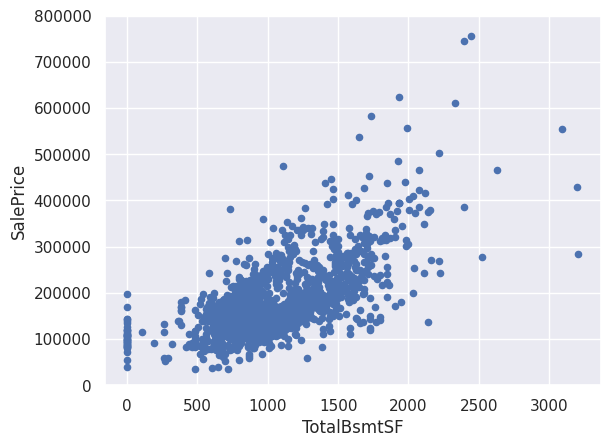

In [ ]:
#Análise bivariada SalePrice/TotalBsmtSF
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Podemos nos sentir tentados a eliminar algumas observações (por exemplo, TotalBsmtSF > 3000) porém não vale a pena já que eles parecem seguir a tendência.

# **5. Testar suposições**

Quem é 'SalePrice'?

A resposta a esta pergunta está em testar os pressupostos subjacentes às bases estatísticas para a análise multivariada. Já fizemos uma limpeza de dados e descobrimos muito sobre 'SalePrice'. Agora é hora de aprofundar e entender como 'SalePrice' atende aos pressupostos estatísticos que nos permitem aplicar técnicas multivariadas.

De acordo com Hair e cols. (2013), quatro premissas devem ser testadas:

1. **Normalidade** - Quando falamos de normalidade o que queremos dizer é que os dados
devem se parecer com uma distribuição normal. Isso é importante porque vários testes estatísticos dependem disso. Neste exercício, vamos apenas verificar a normalidade univariada para 'SalePrice' (que é uma abordagem limitada). Lembre-se de que a normalidade univariada não garante a normalidade multivariada (que é o que gostaríamos de ter), mas ajuda. Outro detalhe a ser levado em consideração é que em grandes amostras (>200 observações) a normalidade não é um problema tão grande. No entanto, se resolvermos a normalidade, evitamos muitos outros problemas (por exemplo, Heterocedasticidade e que palavra complicada em), então essa é a principal razão pela qual estamos fazendo essa análise.

2. **Homocedasticidade** - só espero ter escrito certo. A homocedasticidade refere-se à 'suposição de que as variáveis ​​dependentes apresentam níveis iguais de variância em toda a faixa de variáveis ​​preditoras' (Hair et al., 2013). A homocedasticidade é desejável porque queremos que o termo de erro seja o mesmo em todos os valores das variáveis ​​independentes.

3. **Linearidade** - A maneira mais comum de avaliar a linearidade é examinar gráficos de dispersão e procurar padrões lineares. Se os padrões não forem lineares, valeria a pena explorar as transformações de dados. No entanto, não vamos entrar nisso porque a maioria dos gráficos de dispersão que vimos parecem ter relações lineares.

4. **Ausência de erros correlacionados** - Erros correlacionados, como a definição sugere, acontecem quando um erro é correlacionado a outro. Por exemplo, se um erro positivo faz um erro negativo sistematicamente, isso significa que há uma relação entre essas variáveis. Isso ocorre frequentemente em séries temporais, onde alguns padrões estão relacionados ao tempo. Também não entraremos nisso. No entanto, se você detectar algo, tente adicionar uma variável que possa explicar o efeito que você está obtendo. Essa é a solução mais comum para erros correlacionados.

## A procura pela normalidade

O ponto aqui é testar 'SalePrice' de uma maneira muito enxuta. Faremos isso prestando atenção em:

1. Histograma - Curtose e assimetria.

2. Gráfico de probabilidade normal - A distribuição dos dados deve seguir de perto a diagonal que representa a distribuição normal

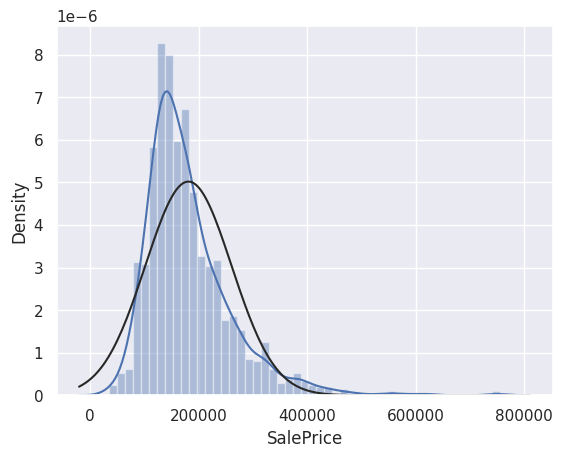

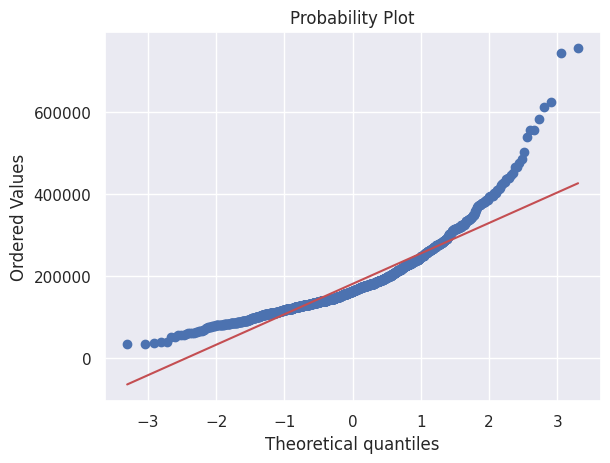

In [ ]:
#Histograma e gráfico de probabilidade normal
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' não é normal. Mostra 'pico', assimetria positiva e não segue a linha diagonal.

Mas nem tudo está perdido. Uma simples transformação de dados pode resolver o problema. Essa é uma das coisas incríveis que você pode aprender em livros de estatística: no caso de assimetria positiva, as transformações de log geralmente funcionam bem.

In [ ]:
#Aplicando uma log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

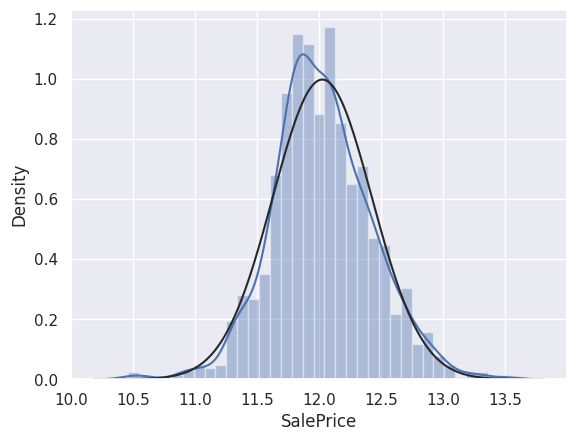

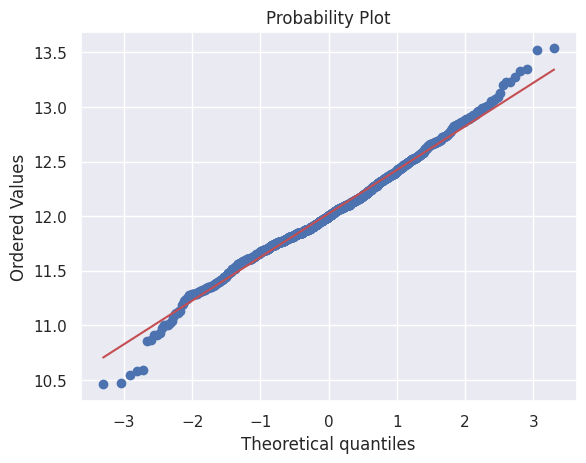

In [ ]:
#histograma transformado e gráfico de probabilidade normal
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Agora vamos verificar o que está acontecendo com a variável 'GrLivArea'!

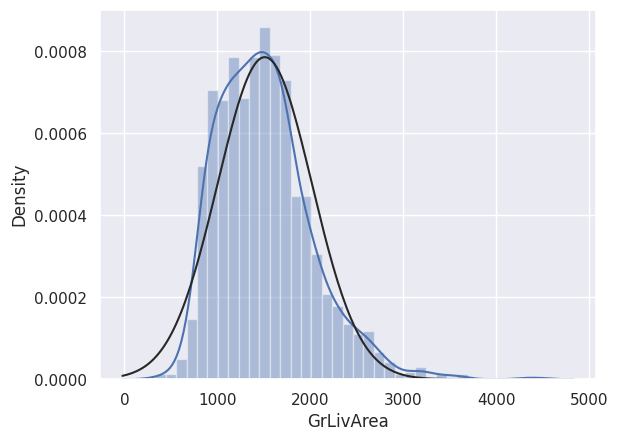

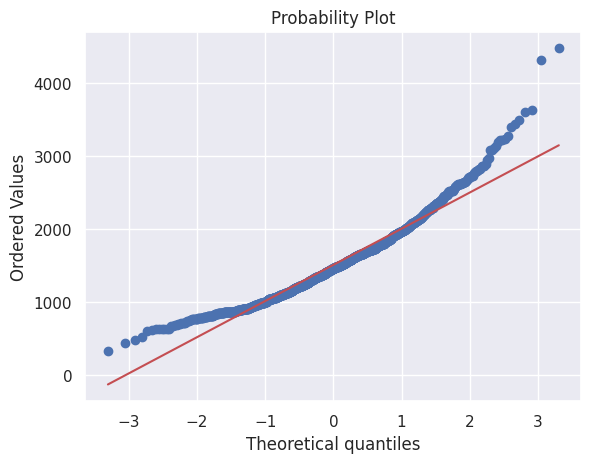

In [ ]:
#Histograma e gráfico de probabilidade normal
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Parece que temos uma assimetria então repetiremos o mesmo processo da variável 'SalePrice'!

In [ ]:
#Aplicando uma log transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

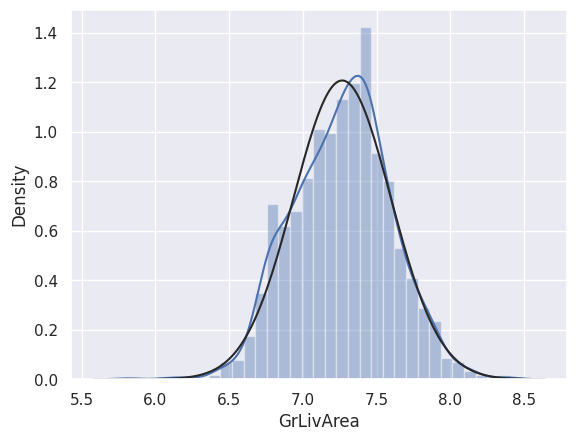

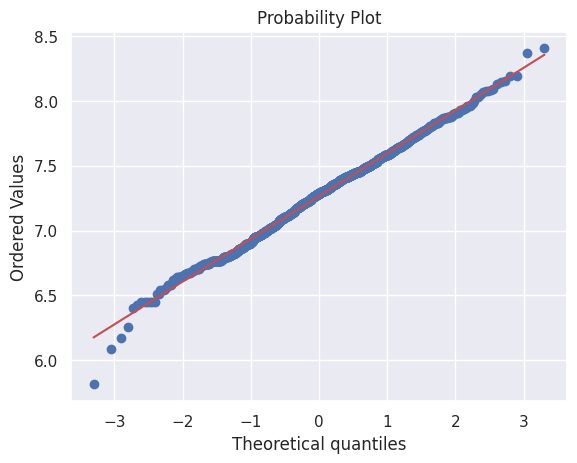

In [ ]:
#histograma transformado e gráfico de probabilidade normal
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Vamos para o próximo...

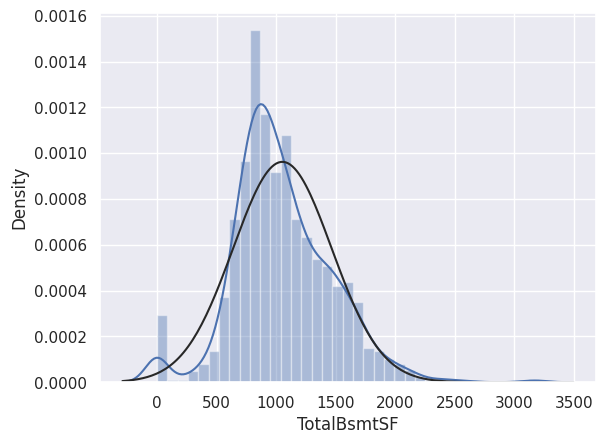

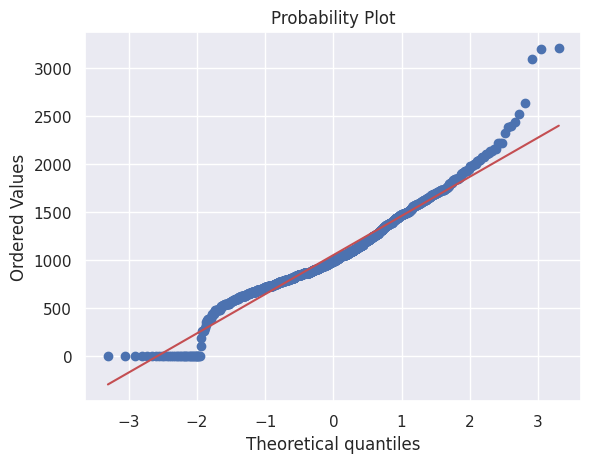

In [ ]:
#Histograma e gráfico de probabilidade normal
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

Ok, agora estamos lidando com algo diferente. O que temos aqui?

Algo que, em geral, apresenta assimetria.
Um número significativo de observações com valor zero (casas sem porão).
Um grande problema porque o valor zero não nos permite fazer transformações de log.
Para aplicar uma transformação de log aqui, vamos criar uma variável que pode ter o efeito de ter ou não ter porão (variável binária). Em seguida, faremos uma transformação de log para todas as observações diferentes de zero, ignorando aquelas com valor zero. Assim podemos transformar os dados, sem perder o efeito de ter ou não embasamento.

Não tenho certeza se essa abordagem está correta. Parecia certo para mim.

In [ ]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

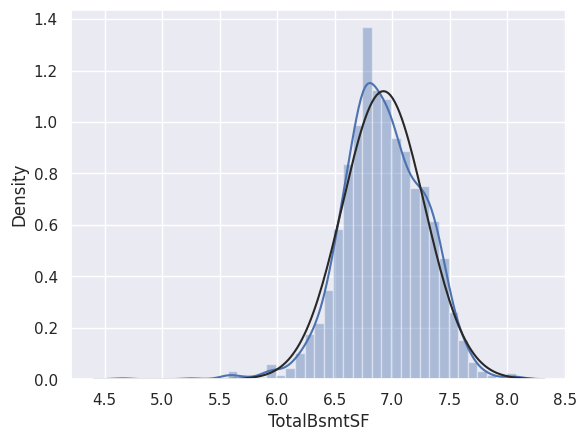

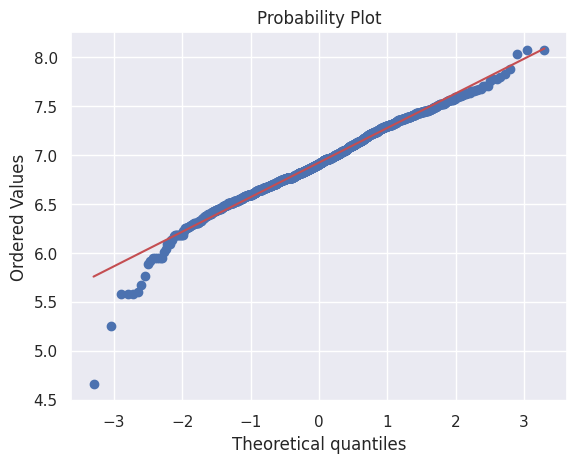

In [ ]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

##Vamos agora falar de 'homocedasticidade'

A melhor abordagem para testar a homocedasticidade para duas variáveis ​​métricas é graficamente. Os desvios de uma dispersão igual são mostrados por formas como cones (pequena dispersão em um lado do gráfico, grande dispersão no lado oposto) ou diamantes (um grande número de pontos no centro da distribuição).

Vamos então começando por 'SalePrice' e 'GrLivArea'...

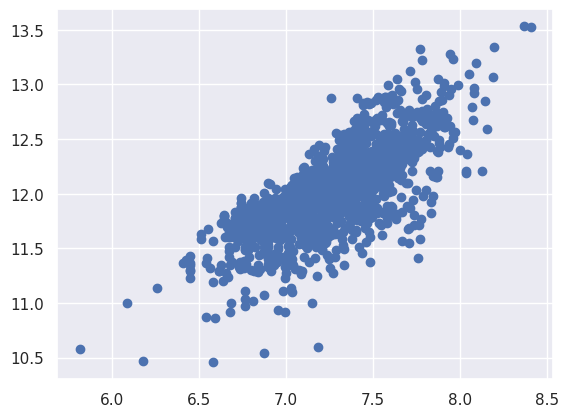

In [ ]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

As versões mais antigas deste gráfico de dispersão (anteriores às transformações de log) tinham uma forma cônica (volte e verifique 'Gráficos de dispersão entre 'SalePrice' e as variáveis ​​correlacionadas). Como você pode ver, o gráfico de dispersão atual não tem mais uma forma cônica. Esse é o poder da normalidade! Apenas garantindo a normalidade em algumas variáveis, resolvemos o problema da homocedasticidade.

Agora vamos verificar 'SalePrice' com 'TotalBsmtSF'.

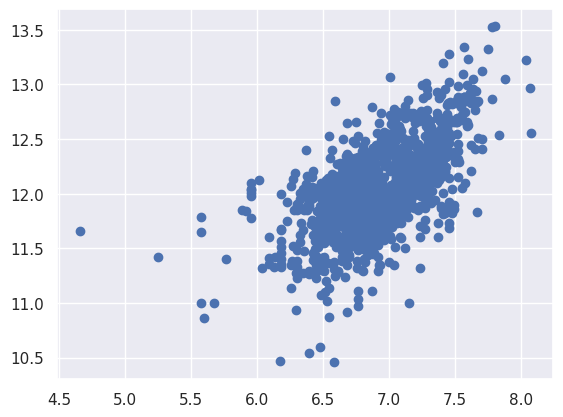

In [ ]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

Podemos dizer que, em geral, 'SalePrice' apresentam níveis iguais de variação em toda a faixa de 'TotalBsmtSF'. Bem interessante!

##Por último nós temos Dummy Variables

In [ ]:
#Conversão da Variável Categorica em um Dummy
df_train = pd.get_dummies(df_train)

### Conclusão

É isso! Chegamos ao fim de mais uma parte.

Ao longo deste kernel colocamos em prática muitas das estratégias. Filosofamos sobre as variáveis, analisamos 'SalePrice' sozinho e com as variáveis ​​mais correlacionadas, lidamos com dados perdidos e outliers, testamos alguns dos pressupostos estatísticos fundamentais e até transformamos variáveis ​​categoriais em variáveis ​​Dummy. Isso é muito trabalho que o Python nos ajudou a tornar mais fácil.

Mas ainda não acabou. Agora é hora de pegarmos a variável 'SalePrice' e tentarmos prever o comportamento dela. Você que a variável 'SalePrice' se identifica mais com regressão linear? Ou você acha que ela prefere métodos de conjunto? Ou talvez outra coisa?

#**6. Mãos a obra com Machine Learning**

Neste capitulo iremos aplicar uma Regressão Linear como nosso modelo de Machine Learning para resumirmos em estatística ou econometria, regressão linear é uma equação para se estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x. A regressão, em geral, tem como objectivo tratar de um valor que não se consegue estimar inicialmente.


In [ ]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. Random_state = 42 para sempre obter a mesma divisão da base quando o código for executado
X = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
Y = df_train[['SalePrice']]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 ,random_state=42)

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Vamos calcular também o coeficience e o intercept mas depois explicarei mais sobre os dois.

In [ ]:
lr.coef_

array([[ 0.09965371,  0.50603251,  0.0854514 ,  0.0356791 , -0.03771973,
         0.00287211]])

In [ ]:
lr.intercept_

array([1.74440453])

## **Pipeline**

Antes de prosseguirmos vamos criar nosso pipeline para nos ajudar a compreender nosso modelo melhor depois.

Um pipeline consiste em uma cadeia de elementos de processamento ( processos, threads , corrotinas, funções, etc.), dispostos de forma que a saída de cada elemento seja a entrada do próximo, o nome é por analogia a um pipeline físico. Normalmente, alguma quantidade de buffer é fornecida entre elementos consecutivos. As informações que fluem nesses pipelines geralmente são um fluxo de registros, bytes ou bits , e os elementos de um pipeline podem ser chamados de filtros. Isso também é chamado de padrão de projeto de tubos e filtros. Conectar elementos em um pipeline é análogo à composição de funções.

Abaixo darei um exemplo de um pipeline que vai nos ajudar mais adiante com as nossas métricas.

In [ ]:
def evaluate_model(yHat, y_test):
    r2 = r2_score(y_test, yHat)
    print('R2 Score: ', r2)

    mae = mean_absolute_error(y_test, yHat)
    print('MAE: ', mae)

    mse = mean_squared_error(y_test, yHat)
    print('MSE: ', mse)

    residuals = y_test.values - yHat
    plt.figure(figsize=(8, 6))
    plt.scatter(yHat, residuals)
    plt.axhline(y=0, color='r', linestyle='-')
    plt.title('Residuals')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()



## **Padronização**

Agora iremos padronizar nossos dados as duas técnicas que mais vejo usar são o MinMaxScaler que o parâmetro feature_range= (0,1) é o default que resultará a normalização variando entre 0 e 1. Lembrando que esses valores podem ser definidos da maneira que for mais conveniente para você caso você mude a escala e também é possível conseguir os valores na escala original usando StandardScaler que eu usarei adiante.

In [ ]:
std_scaler = StandardScaler()

In [ ]:
x_train_std = std_scaler.fit_transform(x_train)
x_test_std = std_scaler.transform(x_test)

## **Transformar dados**

Se você reparou então pode estar se perguntando agora o do por que eu apliquei somente fit_transform nos dados x_train que treinamos e nos dados x_test aplicamos somente o transform, a explicação seria:

Quando você faz o fit faz a padronização desejada na faixa que você quer e o transform aplica essa transformação nos nossos dados, porém se fizermos o fit nos nossos dados de x_test nós iremos fitar o nosso conjunto de teste mas isso no mundo real é impossivel pois você não tem como fitar algo que nunca viu ou nunca aprendeu então temos que fazer com que o conjunto de teste aprenda com um conjunto real. Então o que fazemos é somente transformar o que ele já aprendeu com seu conjunto de treino. Caso se sinta a vontade e curioso procure mais para saber sobre pois não iremos a fundo nisso.


**Agora vamos continuar com nosso modelo...**

In [ ]:
lr = LinearRegression()
lr.fit(x_train_std, y_train)
y_hat = lr.predict(x_test_std)

In [ ]:
lr.coef_

array([[ 0.13659948,  0.16041783,  0.06385319,  0.04160839, -0.02047139,
         0.08906339]])

**Coeficiente**

Podemos analisar que quando o coeficiente é mais perto de zero menos a váriavel importa para o nosso modelo pois quanto mais perto de zero menos peso ela vai ter para o nosso modelo, como podemos analisar a váriavel com o valor '-0.02047139' que seria a mais perto de zero é a variável 'FullBath', que como falei lá em cima de como a variável me parecia estranha mas mesmo assim vamos continuar em diante.

Temos também que tomar cuidado com variáveis que são muito distantes de zero pois quanto maior a variável maior o peso dela então qualquer ajuste nesse coeficiente pode trazer uma grande mudança para o nosso modelo.

In [ ]:
lr.intercept_

array([12.02538563])

**A Constante é o coletor de lixo para o modelo de regressão**


O termo constante na análise de regressão linear parece ser uma coisa tão simples. Também conhecido como intercepto y, é simplesmente o valor no qual a linha ajustada cruza o eixo y.

Embora o conceito seja simples, já vi muita confusão em relação à interpretação da constante. Esse não é um fato surpreendente, pois o valor do termo constante é quase sempre sem significado!
Mesmo que a definição zero para todos os preditores seja um cenário plausível, e mesmo se você coletar dados dentro desse intervalo de zero, a constante ainda pode ser sem significado!

O termo constante é, em parte, estimado pela omissão dos preditores de uma análise de regressão. Em essência, ele serve como uma lixeira para qualquer viés que não seja considerado pelos termos do modelo. Você pode visualizar isso imaginando que a linha de regressão flutua para cima e para baixo (ajustando a constante) até um ponto em que a média dos resíduos seja zero, o que é uma suposição fundamental para a análise de resíduos. Essa flutuação não se fundamenta no que faz sentido para a constante, mas sim no que funciona matematicamente para produzir essa média zero.

A constante garante que os resíduos não tenham um viés global positivo ou negativo, mas também dificulta a interpretação do valor da constante porque absorve o viés.

## **Regularização**

Regularização é uma técnica para análises estatísticas que aparecem em algumas aplicações, uma delas talvez mais conhecida é a regularização l1 e l2 que também são conhecidas como Laço e Ridge Regression.

l1, Lasso: soma dos quadrados dos resíduos + penalidade * | inclinação |

l2, Ridge: soma dos quadrados dos resíduos + penalidade * (inclinação)²

A maior diferença entre Ridge e Lasso, é que quando elevamos a variável ao quadrado para l2, não importa o quão alta possa ser a penalidade imposta, a inclinação da reta não alcança o 0º, mas em l1 por usar o módulo da variável, pode reduzir a 0, podendo ser removida do modelo preditivo. Mais adiante usaremos Lasso para treinar nosso modelo e iremos comparar para ver se tem diferença ou com nosso modelo que não usamos a regularização, além disso vamos discutir um pouco mais sobre algumas métricas de avaliação do modelo.

In [ ]:
lasso_r = Lasso(alpha=0.01)
lasso_r.fit(x_train_std, y_train)
y_hat_l = lasso_r.predict(x_test_std)

R2 Score:  0.8249723662169424
MAE:  0.12904936874119396
MSE:  0.029392998960514404


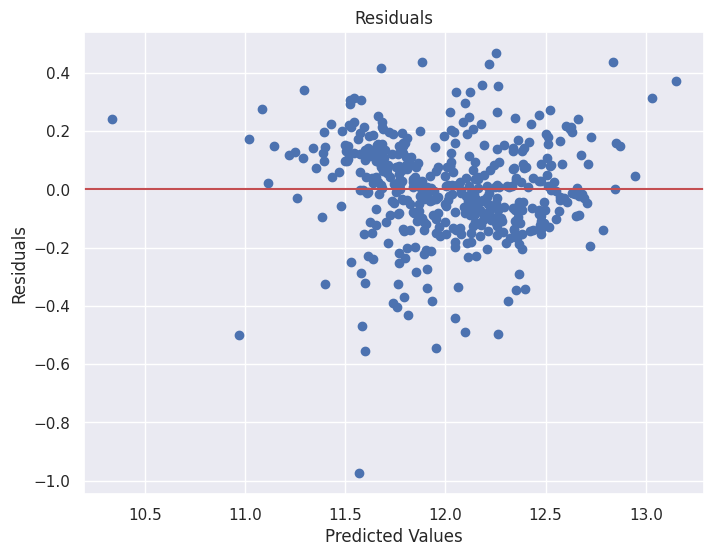

In [ ]:
#Modelo sem Lasso
model1 = evaluate_model(y_hat, y_test)

R2 Score:  0.8260225892056369
MAE:  0.1271510847329249
MSE:  0.02921663136330821


ValueError: x and y must be the same size

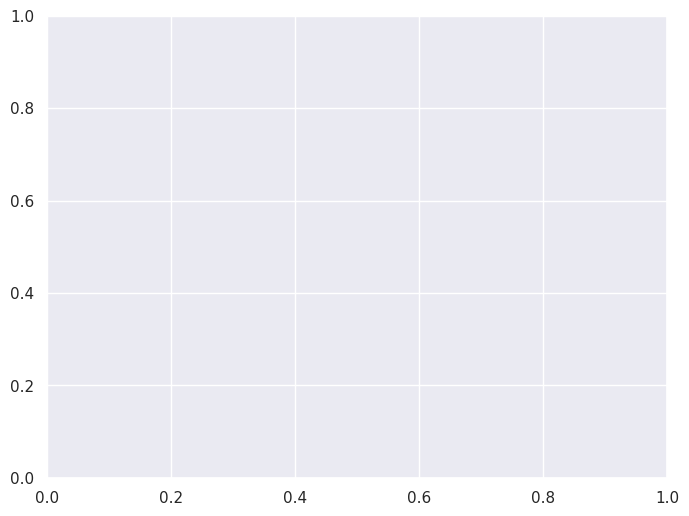

In [ ]:
#Modelo usando Lasso
model2 = evaluate_model(y_hat_l, y_test)

## **Métricas**

Então, o que seria o 'R2 Score', 'MAE' e 'MSE'? O que são essas métricas destinadas para avaliar modelos de regressão e o que elas representam?

Diante disso, neste texto serão apresentadas algumas métricas que podem ser importantes na hora de avaliar modelos de regressão e como elas podem ser interpretadas principalmente para descrever os seus resultados. As métricas abordadas serão a R², Erro Absoluto Médio (MAE), Erro Quadrático Médio (MSE).

**R²**

A métrica R², também conhecida como R-dois ou coeficiente de determinação, representa o percentual da variância dos dados que é explicado pelo modelo. Os resultados variam de 0 a 1, geralmente também são expressos em termos percentuais, ou seja, variando entre 0% e 100%. Quanto maior é o valor de R², mais explicativo é o modelo em relação aos dados previstos.

**Erro Médio Absoluto**

O erro médio absoluto (MAE — do inglês Mean Absoluto Error), mede a média da diferença entre o valor real com o predito. Mas por haver valores positivos e negativos, é adicionado um módulo entre a diferença dos valores. Além disso, esta métrica não é afetada por valores discrepantes — os denominados outliers.

O Valor de saída da equação tem a mesma escala dos dados utilizados para previsão, logo fica mais fácil a sua interpretação. Se o valor de MAE resultante for igual a 10,01 m, por exemplo, este resultado significa que o modelo pode estar errando em média 10,01 m para mais quanto para menos em relação ao valor correto. Por isso que para uma previsão futura, este resultado precisa ser levado em consideração para a tomada de decisão. Contudo o quanto este erro representa em relação ao valor real percentualmente?

**Erro Quadrático Médio**

O erro quadrático médio (MSE — do inglês Mean Squared Error) é uma métrica que calcula a média de diferença entre o valor predito com o real, como a métrica MAE. Entretanto, ao invés de usar o módulo do resultado entre o valor de y e ŷ, nesta métrica a diferença é elevada ao quadrado. Desta maneira penalizando valores que sejam muito diferentes entre o previsto e o real. Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.

Apesar de sua ideia poderosa, a métrica MSE apresenta um problema de interpretabilidade. Por haver a elevação ao quadrado, a unidade fica distorcida, em outras palavras, se a unidade medida for metros (m), o resultado será em m². Por isso que uma adaptação da MSE é a RMSE que será apresentada abaixo.

# **7. Conclusão**

Podemos concluir então que o modelo usando Lasso teve a perfomance um pouco melhor que o modelo sem regularização nenhuma, nos usamos a Regressão Linear e com todas nossas análises chegamos a 82,6% do seu coeficiente de determinação, tente você depois tirar algumas variáveis ou adicionar outras ou até mesmo tentar um modelo diferente para ver aonde você consegue chegar, 82,6% é um bom resultado mas tenho certeza que você irá conseguir melhorar isso.

Abaixo iremos fazer a submissão do nosso modelo para um arquivo .csv e ai infelizmente chegamos ao final deste notebook.

In [ ]:
test_ids = df_test['Id']
submission = pd.concat([test_ids, pd.Series(y_hat_l, name='SalePrice')], axis=1)


In [ ]:
submission.to_csv('./submission.csv', index=False, header=True)